In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
data=pd.read_excel("/Users/abdouniang/Downloads/data.xlsx")

In [142]:
data.shape

(9568, 5)

In [143]:
#Take all features in my dataset
X=data.iloc[:,:-1]
X

,X1,X2,X3,X4
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [144]:
#Take the target in mt dataset
y=data.iloc[:,-1]
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: Y, Length: 9568, dtype: float64

In [145]:
#Dimension of my data set
data.head()

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [146]:
#Compute the mean and the std for all column of my dataset
def features_Standart(data):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    mse=(data-mean)/std
#     print("mean",mean)
#     print("std",std)
    return mse

In [148]:
#Apply the function to my dataset for all my feature 
data.iloc[:,:-1] = features_Standart(data.iloc[:,:-1])
data.head()

,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [149]:
data.describe()

,X1,X2,X3,X4,Y
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9568.000000
mean,2.757572e-17,-1.742846e-17,-3.563435e-17,-4.355954e-17,454.365009
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,17.066995
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00,420.260000
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01,439.750000
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01,451.550000
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01,468.430000
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00,495.760000


In [150]:
#Split the data for train and test 
df=data.iloc[[2,3,4,5,6]]
df.head()

,X1,X2,X3,X4,Y
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90
5,0.888177,0.404037,-0.173290,-0.995854,443.67
6,-0.504722,-0.814167,0.128134,0.132266,467.35


In [151]:
def split_data(df, train_percent):
  ########## fill the code ########
  np.random.seed(1)
  perm=np.random.permutation(df.index)

  n=len(df)

  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]


  X_train = train.iloc[:,:-1]
  Y_train = train.iloc[:,-1]

  X_test= test.iloc[: , :-1]
  Y_test = test.iloc[:,-1]
  return X_train, X_test, Y_train, Y_test

In [152]:
X_train, X_test, Y_train, Y_test =split_data(data, 0.8)

In [153]:
X_train.shape, X_test.shape

((7654, 4), (1914, 4))

In [154]:
Y_train.shape, Y_test.shape,

((7654,), (1914,))

In [160]:
#Define a function to add One one my features

def Add_ones(X):
    X_new=np.hstack([np.ones((X.shape[0],1)),X])
    return X_new

#Define a Funcrtion which allow to compute the cost
def Compute_cost(X,y,theta):
    loss=(1/2) *np.sum((X@theta - y)**2)
    return loss
#Define the functionTrain

def Train(X,y,lr,epoch):
    X=Add_ones(X.values)
    m=len(y)
    theta=np.zeros(X.shape[1])
    cost_history=np.zeros(epoch)
#     print("######",X)
    for j in range(epoch):
        cost_history[j]=Compute_cost(X,y,theta)
        theta_new= theta - 1/m * lr * X.T@(X@theta - y) 
#         print("theta new")
        theta=theta_new
    return theta,cost_history
    
#define The function of prediction 

def Predict(X,theta):
    X=Add_ones(X.values)
    return X@theta

#Define the MSE(mean Square error)
def Mse(y,yPred):
    Loss=1/len(y) * np.sum((y.values - yPred)**2)
    return Loss

In [161]:
epoch = 30
theta, loss_history = Train(X_train, Y_train, 0.3, epoch)

In [162]:
theta

array([454.33774184, -11.44757209,  -5.43840813,   0.97795748,
        -1.17688825])

In [163]:
loss_history

array([7.91472742e+08, 3.87264176e+08, 1.89772537e+08, 9.30426655e+07,
       4.56475050e+07, 2.24233177e+07, 1.10426031e+07, 5.46516383e+06,
       2.73135663e+06, 1.39097216e+06, 7.33411918e+05, 4.10482178e+05,
       2.51565909e+05, 1.73058164e+05, 1.33989886e+05, 1.14283729e+05,
       1.04099458e+05, 9.86131859e+04, 9.54591972e+04, 9.34764160e+04,
       9.20941672e+04, 9.10311861e+04, 9.01481230e+04, 8.93752630e+04,
       8.86771016e+04, 8.80349801e+04, 8.74385718e+04, 8.68817054e+04,
       8.63603136e+04, 8.58714235e+04])

In [164]:
ypred = Predict(X_test, theta)
mse = Mse(Y_test, ypred)
mse

24.10206904944692

Text(0, 0.5, 'Cost, $J(\\theta)$')

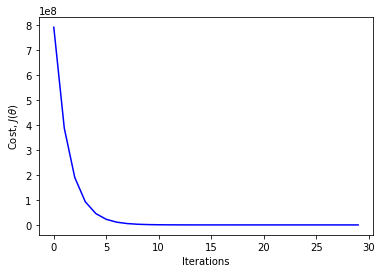

In [165]:
plt.figure()
plt.plot(np.arange(epoch), loss_history, c='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost, ' + r'$J(\theta)$')